In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

%matplotlib inline

def plot_distribution(X, axes=None):
    """给定随机变量，绘制PDF(概率密度函数)、PMF(概率质量函数)和CDF(累计分布函数)"""
    if axes is None:
        fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    x_min, x_max = X.interval(0.99)
    x = np.linspace(x_min, x_max, 1000)

    # 判断有没有pdf，即是不是连续分布
    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x, X.pdf(x), label='PDF')
        axes[0].fill_between(x, X.pdf(x), alpha=0.5)
    else: # 离散分布
        x_int = np.unique(x.astype(int))
        axes[0].bar(x_int, X.pmf(x_int), label="PMF") # pmf 和 pdf 是类似的
    axes[1].plot(x, X.cdf(x), label="CDF")

    for ax in axes:
        ax.legend()
    return axes

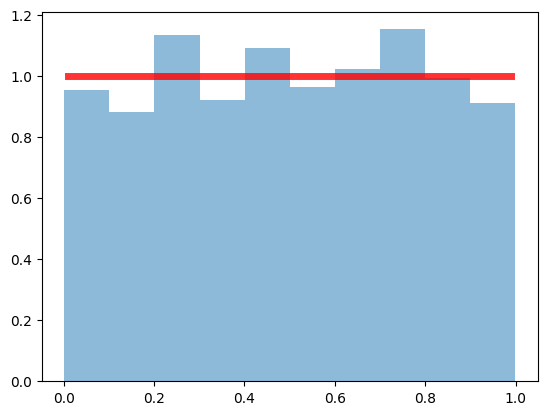

In [4]:
# 生成样本
fig, ax = plt.subplots(1, 1)
r = uniform.rvs(loc=0, scale=1, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.5)

# 均匀分布概率密度函数 pdf
x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x), 'r-', lw=5, alpha=0.8, label='uniform pdf')

In [7]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([9, 8, 7, 6, 5, 4, 3, 2, 1])
mean = np.mean(x)
var = np.var(x) # 默认总体
var_unbias = np.var(x, ddof=1) # 样本方差（无偏方差）
cov = np.cov(x, y)
mean, var, var_unbias, cov

(5.0,
 6.666666666666667,
 7.5,
 array([[ 7.5, -7.5],
        [-7.5,  7.5]]))

array([<Axes: >, <Axes: >], dtype=object)

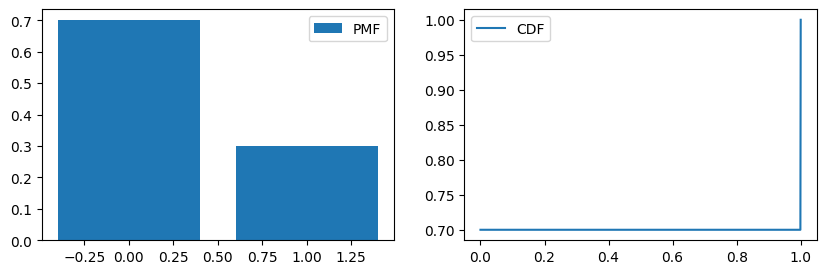

In [9]:
# 伯努利分布（两点分布）

from scipy.stats import bernoulli
fig, axes = plt.subplots(1, 2, figsize=(10, 3)) # 画布
p = 0.3
X = bernoulli(p) # 伯努利分布
plot_distribution(X, axes=axes)

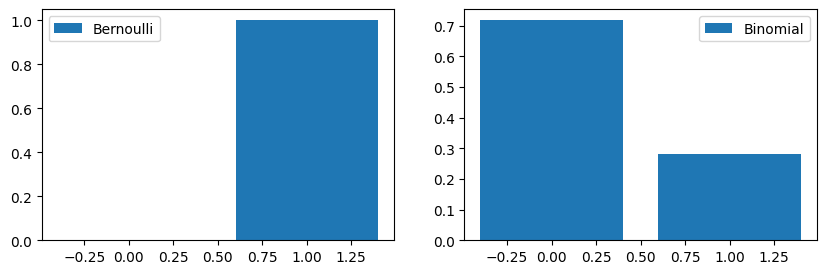

In [10]:
 # 产生成功的概率
possibility = 0.3
def trials(n_samples):
    samples = np.random.binomial(n_samples, possibility) # 成功的次数
    proba_zero = (n_samples - samples) / n_samples
    proba_one = samples / n_samples
    return [proba_zero, proba_one]

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# 一次试验， 伯努利分布
n_samples = 1
axes[0].bar([0, 1], trials(n_samples), label="Bernoulli")

# n 次试验， 二项分布
n_samples = 1000
axes[1].bar([0, 1], trials(n_samples), label="Binomial")

for ax in axes:
    ax.legend()

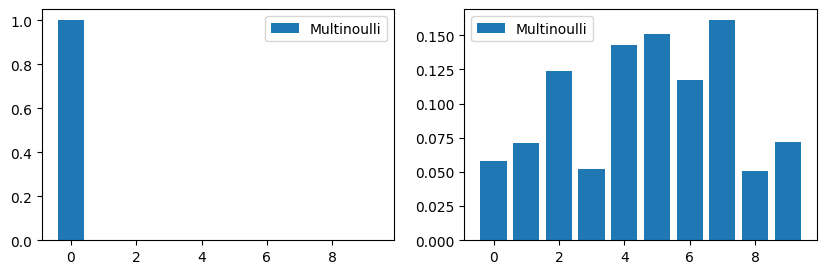

In [2]:
# 范畴分布
def k_possibilities(k):
    """随机产生一组10维概率向量"""
    res = np.random.rand(k)
    _sum = sum(res)

    for i, x in enumerate(res):
        res[i] = x / _sum

    return res

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# 一次试验，范畴分布
k, n_samples = 10, 1
samples = np.random.multinomial(n_samples, k_possibilities(k))
axes[0].bar(range(len(samples)), samples / n_samples, label='Multinoulli')

# n次试验，多项分布
n_samples = 1000
samples = np.random.multinomial(n_samples, k_possibilities(k))
axes[1].bar(range(len(samples)), samples / n_samples, label='Multinoulli')

for ax in axes:
    ax.legend()

array([<Axes: >, <Axes: >], dtype=object)

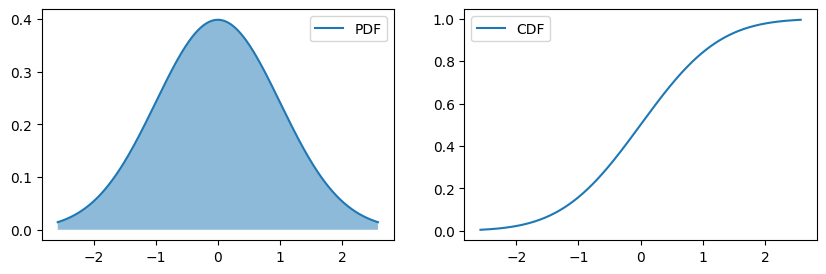

In [4]:
# 正态分布
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
mu, sigma = 0, 1
X = norm(mu, sigma)
plot_distribution(X, axes=axes)

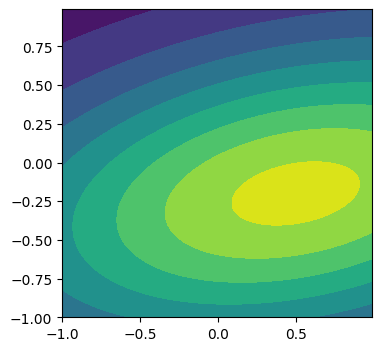

In [6]:
# 多元正态分布
from scipy.stats import multivariate_normal

x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
fig = plt.figure(figsize=(4,4))
axes = fig.add_subplot(111)
mu = [0.5, -0.2] # 均值
sigma = [[2.0, 0.3], [0.3, 0.5]] # 协方差矩阵
X = multivariate_normal(mu, sigma)
axes.contourf(x, y, X.pdf(pos))

array([<Axes: >, <Axes: >], dtype=object)

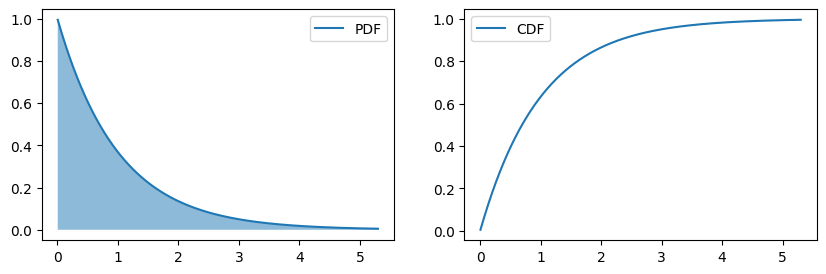

In [8]:
# 指数分布
from scipy.stats import expon

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# 定义 scale = 1 / lambda
X = expon(scale=1)
plot_distribution(X, axes=axes)

array([<Axes: >, <Axes: >], dtype=object)

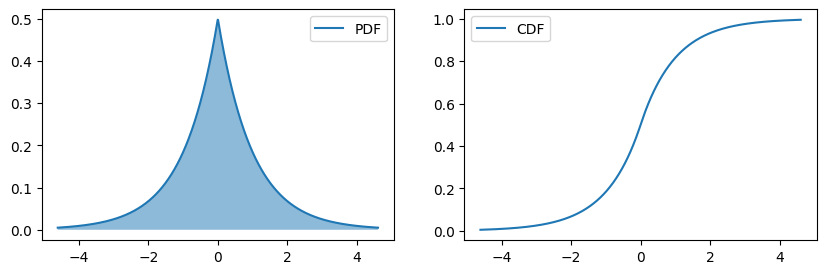

In [9]:
# 拉普拉斯分布
from scipy.stats import laplace
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
mu, gamma = 0, 1
X = laplace(loc=mu, scale=gamma)
plot_distribution(X, axes=axes)

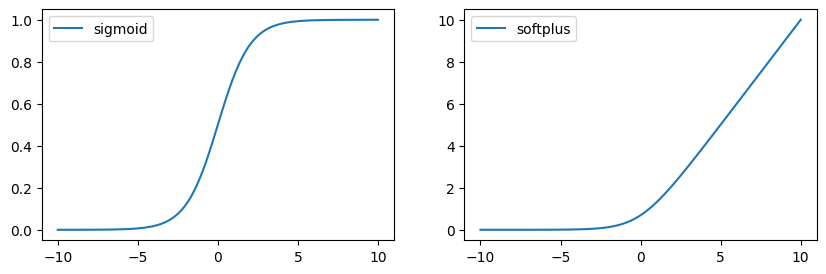

In [3]:
x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))
softplus = np.log(1 + np.exp(x))
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].plot(x, sigmoid, label='sigmoid')
axes[1].plot(x, softplus, label='softplus')
for ax in axes:
    ax.legend()

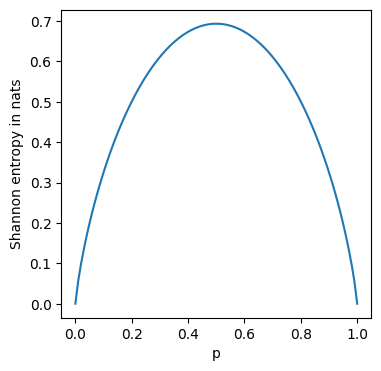

In [5]:
# 香农熵
p = np.linspace(1e-6, 1-1e-6, 100)
entropy = (p - 1) * np.log(1 - p) - p * np.log(p)
plt.figure(figsize=(4, 4))
plt.plot(p, entropy)
plt.xlabel('p')
plt.ylabel('Shannon entropy in nats')
plt.show()

In [6]:
import math

def H(sentence):
    """最优编码长度"""
    entropy = 0

    # 这里有256个可能的ASCII符号
    for character_i in range(256):
        Px = sentence.count(chr(character_i)) / len(sentence)
        if Px > 0:
            entropy += -Px * math.log(Px, 2)
    return entropy

import random

simple_message = "".join([chr(random.randint(0, 64)) for i in range(500)])
print(simple_message)
H(simple_message)

8"91 2318!);<';>..44$- 6131/>!:
1)!=60
 +93;2'2#)7">54>
8
.&<-@>5#!=%="(1--
4//%$&..#8<12./	?'0;	2.'-0
+./7% &41:>1	>96+@8
#.62/; &$#19&/#/./*0=$(<
<;7@!$ 6- 		9&@	)?=-8--/$)#


5.905399819404872

In [9]:
# KL散度
from scipy.stats import entropy
def kl(p, q):
    """D(P||Q)"""
    p = np.array(p, dtype=float)
    q = np.array(q, dtype=float)
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [10]:
# 测试
p = [0.1, 0.9]
q = [0.1, 0.9]
print(entropy(p, q) == kl(p, q))

True


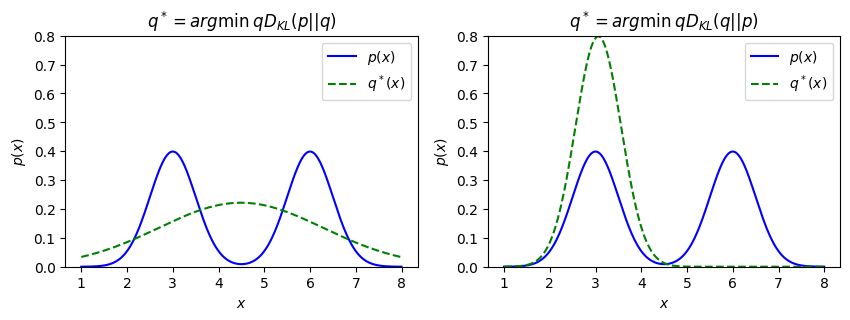

In [13]:
# D(P||Q) 与 D(Q||P) 比较
from scipy.stats import norm

x = np.linspace(1, 8, 500)
y1 = norm.pdf(x, 3, 0.5)
y2 = norm.pdf(x, 6, 0.5)
p = y1 + y2 # 构造 p(x)
KL_pq, KL_qp = [], []
q_list = []

for mu in np.linspace(0, 10, 50):
    for sigma in np.linspace(0.1, 5, 50):
        q = norm.pdf(x, mu, sigma)
        q_list.append(q)
        KL_pq.append(entropy(p, q))
        KL_qp.append(entropy(q, p))

KL_pq_min = np.argmin(KL_pq)
KL_qp_min = np.argmin(KL_qp)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].set_ylim(0, 0.8)
axes[0].plot(x, p/2, 'b', label='$p(x)$')
axes[0].plot(x, q_list[KL_pq_min], 'g--', label='$q^*(x)$')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$p(x)$')
axes[0].set_title('$q^*= {arg\min}_ q D_{KL}(p||q)$')
axes[1].set_ylim(0, 0.8)
axes[1].plot(x, p/2, 'b', label='$p(x)$')
axes[1].plot(x, q_list[KL_qp_min], 'g--', label='$q^*(x)$')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$p(x)$')
axes[1].set_title('$q^*= {arg\min}_ q D_{KL}(q||p)$')
for ax in axes:
    ax.legend(loc='upper right')